Mean Squared Error: 44519777450753.06
R-squared: nan


/Users/kimminji/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current fon

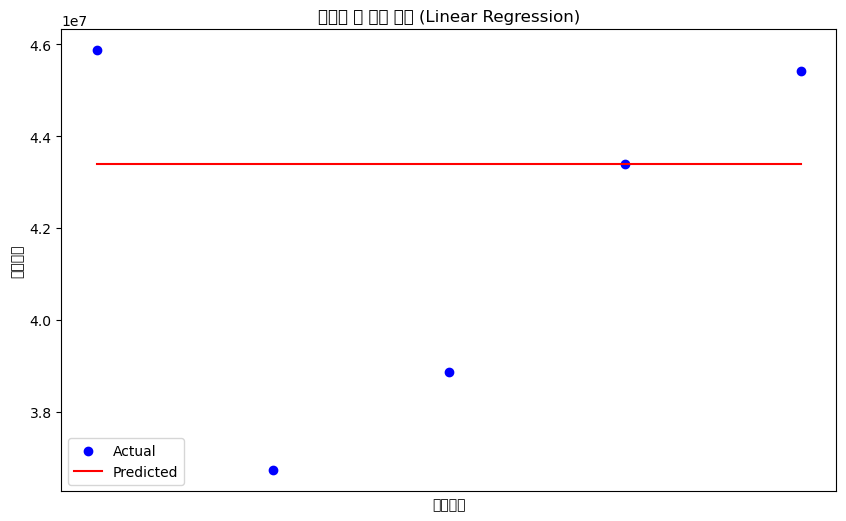

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 2. 데이터 전처리
# '날짜' 열을 datetime 형식으로 변환
df_combined['기준년월'] = pd.to_datetime(df_combined['기준년월'])

# 날짜를 숫자로 변환 (모델에 사용할 수 있도록)
df_combined['날짜_숫자'] = df_combined['기준년월'].apply(lambda x: x.toordinal())

# 독립 변수(X)와 종속 변수(y) 설정
X = df_combined[['날짜_숫자']]
y = df_combined['방문자수']

# 3. 데이터 분할 (학습용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 5. 예측
y_pred = model.predict(X_test)

# 6. 결과 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 7. 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['기준년월'], y, color='blue', label='Actual')
plt.plot(df_combined['기준년월'], model.predict(df_combined[['날짜_숫자']]), color='red', label='Predicted')
plt.xlabel('기준년월')
plt.ylabel('방문자수')
plt.title('방문객 수 추이 예측 (Linear Regression)')
plt.legend()
plt.show()


In [50]:
import pandas as pd

# 1. CSV 파일 불러오기
file1 = '20240823122358_방문자 수(연인원) 추이.csv'
file2 = '20240823122519_방문자 수(연인원) 추이.csv'
file3 = '20240823122600_방문자 수(연인원) 추이.csv'

# 각 파일을 pandas DataFrame으로 읽어오기
df1 = pd.read_csv(file1, encoding='cp949')
df2 = pd.read_csv(file2, encoding='cp949')
df3 = pd.read_csv(file3, encoding='cp949')

# 2. DataFrame 합치기
# 세 개의 DataFrame을 하나로 합치기
df_combined = pd.concat([df1, df2, df3])

# 3. 기준년월을 datetime 형식으로 변환
df_combined['기준년월'] = pd.to_datetime(df_combined['기준년월'], format='%Y%m')

# 4. 기준년월을 기준으로 오름차순 정렬
df_combined = df_combined.sort_values(by='기준년월')

# CSV 파일로 저장
output_file = 'combined_sorted.csv'
df_combined.to_csv(output_file, index=False, encoding='utf-8')

print(f"'{output_file}' 파일로 저장되었습니다.")


'combined_sorted.csv' 파일로 저장되었습니다.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
file_path = 'combined_sorted.csv'
df_combined = pd.read_csv(file_path, encoding='utf-8')

# 2. 데이터 전처리
# 날짜 형식 샘플 출력
print(df_combined['기준년월'].head())

# '기준년월' 칼럼을 datetime 형식으로 변환
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y%m', errors='coerce')  # '201901' 같은 경우
    except ValueError:
        return pd.to_datetime(date_str, format='%Y', errors='coerce')  # '2019' 같은 경우

df_combined['기준년월'] = df_combined['기준년월'].apply(parse_date)

# 변환된 날짜 데이터의 유효성 검사
print(f'Number of NaT values in 기준년월: {df_combined["기준년월"].isna().sum()}')

# '기준년월'을 숫자로 변환 (모델에 사용할 수 있도록)
df_combined['기준년월_숫자'] = df_combined['기준년월'].apply(lambda x: x.toordinal() if pd.notnull(x) else pd.NaT)

# 결측치가 있는 행 제거
df_combined = df_combined.dropna(subset=['기준년월_숫자', '전년동월방문자수', '방문자수증감률', '방문자수'])

# 데이터가 충분한지 확인
print(f'Data shape after cleaning: {df_combined.shape}')

# 3. X 변수에 추가적인 칼럼 포함시키기 (전년동월방문자수, 방문자수증감률)
X = df_combined[['기준년월_숫자', '전년동월방문자수', '방문자수증감률']]

# 4. 종속 변수 y 설정
y = df_combined['방문자수']

# 데이터 확인
print(f'X shape: {X.shape}, y shape: {y.shape}')

# 데이터 분할 (학습용과 테스트용)
if len(X) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("데이터가 너무 적어 학습/테스트 데이터 분할이 불가능합니다.")

# 6. 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 7. 예측
y_pred = model.predict(X_test)

# 8. 결과 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 9. 시각화
plt.figure(figsize=(10, 6))
# 전체 데이터의 예측값을 계산
df_combined['예측값'] = model.predict(df_combined[['기준년월_숫자', '전년동월방문자수', '방문자수증감률']])

plt.scatter(df_combined['기준년월'], df_combined['방문자수'], color='blue', label='Actual')
plt.plot(df_combined['기준년월'], df_combined['예측값'], color='red', label='Predicted')
plt.xlabel('기준년월')
plt.ylabel('방문자수')
plt.title('방문자 수 추이 예측 (Multiple Linear Regression)')
plt.legend()
plt.show()


0    2019-01-01
1    2019-02-01
2    2019-03-01
3    2019-04-01
4    2019-05-01
Name: 기준년월, dtype: object
Number of NaT values in 기준년월: 54
Data shape after cleaning: (0, 5)
X shape: (0, 3), y shape: (0,)


ValueError: 데이터가 너무 적어 학습/테스트 데이터 분할이 불가능합니다.

Missing values in X:
 기준년월_숫자     0
전년동월방문자수    0
방문자수증감률     0
dtype: int64
Missing values in y:
 0
Mean Squared Error: 67739186878278.125
R-squared: nan

Sample of actual values (y_test):
1    36718035.0
Name: 방문자수, dtype: float64

Sample of predicted values (y_pred):
0    44948416.94
dtype: float64


/Users/kimminji/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


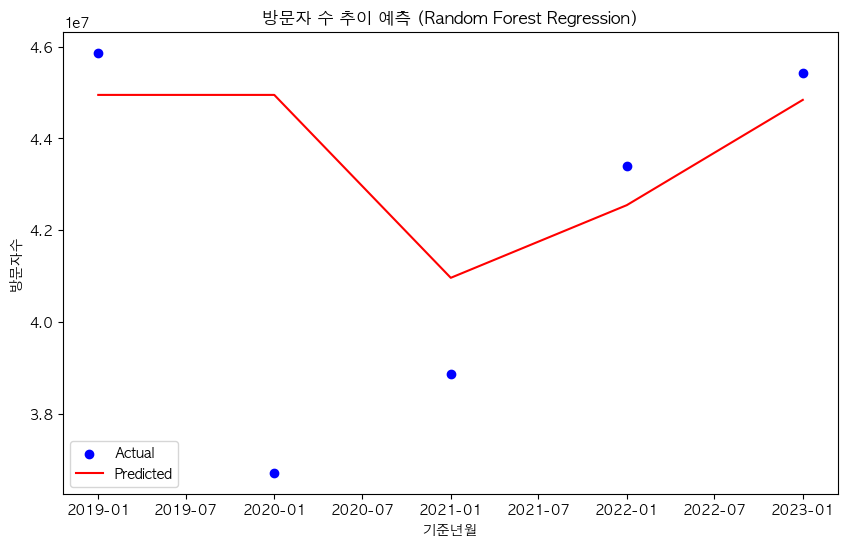

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# 1. 데이터 불러오기
file_path = '20240823121908_방문자 수(연인원) 추이.csv'
df_combined = pd.read_csv(file_path, encoding='cp949')

# 2. 데이터 전처리
# '기준년월' 칼럼의 형식을 먼저 확인하고, 그에 맞는 datetime 형식으로 변환
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y%m')  # '201901' 같은 경우
    except ValueError:
        return pd.to_datetime(date_str, format='%Y')  # '2019' 같은 경우

df_combined['기준년월'] = df_combined['기준년월'].apply(parse_date)

# '기준년월'을 숫자로 변환 (모델에 사용할 수 있도록)
df_combined['기준년월_숫자'] = df_combined['기준년월'].apply(lambda x: x.toordinal())

# 3. X 변수에 추가적인 칼럼 포함시키기 (전년동월방문자수, 방문자수증감률)
X = df_combined[['기준년월_숫자', '전년동월방문자수', '방문자수증감률']]

# 4. 종속 변수 y 설정
y = df_combined['방문자수']

# 결측치 확인
print("Missing values in X:\n", X.isnull().sum())
print("Missing values in y:\n", y.isnull().sum())

# 결측치 처리 (필요시)
X = X.dropna()
y = y.loc[X.index]

# 5. 데이터 분할 (학습용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. 예측
y_pred = model.predict(X_test)

# 8. 결과 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 디버깅: 예측값과 실제값 확인
print("\nSample of actual values (y_test):")
print(y_test.head())
print("\nSample of predicted values (y_pred):")
print(pd.Series(y_pred).head())

# 9. 시각화
plt.figure(figsize=(10, 6))

# 실제 데이터와 예측 데이터를 비교하기 위해 전체 데이터에 대한 예측 값 생성
df_combined_sorted = df_combined.sort_values('기준년월')
plt.scatter(df_combined_sorted['기준년월'], df_combined_sorted['방문자수'], color='blue', label='Actual')
plt.plot(df_combined_sorted['기준년월'], model.predict(df_combined_sorted[['기준년월_숫자', '전년동월방문자수', '방문자수증감률']]), color='red', label='Predicted')

plt.xlabel('기준년월')
plt.ylabel('방문자수')
plt.title('방문자 수 추이 예측 (Random Forest Regression)')
plt.legend()
plt.show()


# [ARIMA]: 시계열 예측을 위한 통계적 모델

/Users/kimminji/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

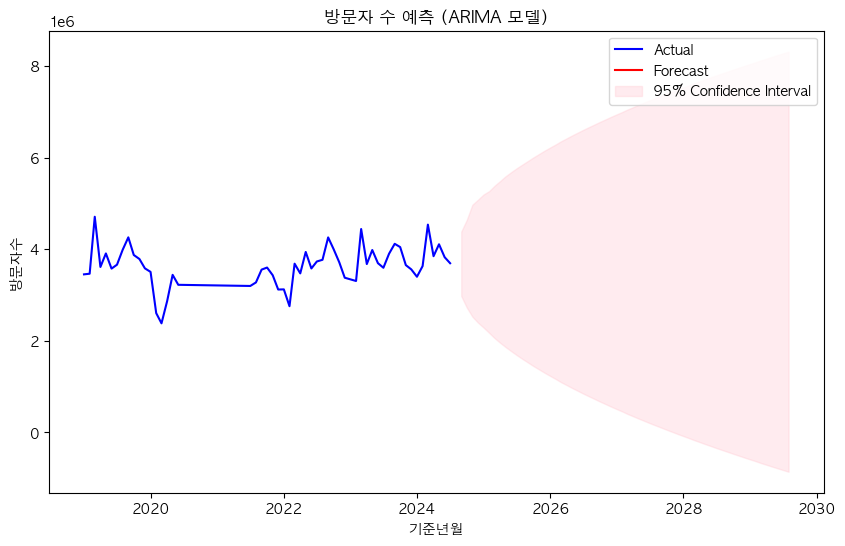

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 불러오기
file_path = 'combined_sorted.csv'
df_combined = pd.read_csv(file_path,encoding='utf-8')

# 데이터 전처리
def parse_date(date_str):
    return pd.to_datetime(date_str, errors='coerce')

df_combined['기준년월'] = df_combined['기준년월'].apply(parse_date)
df_combined.set_index('기준년월', inplace=True)

# ARIMA 모델 피팅
model = ARIMA(df_combined['방문자수'], order=(5,1,0))  # (p,d,q) 파라미터는 조정 필요
model_fit = model.fit()

# 예측
forecast_steps = 60  # 미래 5년 예측
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_combined.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# 신뢰 구간 추출
conf_int = forecast.conf_int()
lower_bound = conf_int.iloc[:, 0]
upper_bound = conf_int.iloc[:, 1]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_combined.index, df_combined['방문자수'], label='Actual', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_series.index, lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('기준년월')
plt.ylabel('방문자수')
plt.title('방문자 수 예측 (ARIMA 모델)')
plt.legend()
plt.show()



# [ Prophet]: 시계열 예측 모델 (시간에 다른 추세를 분석하고 예측하는데 유용)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


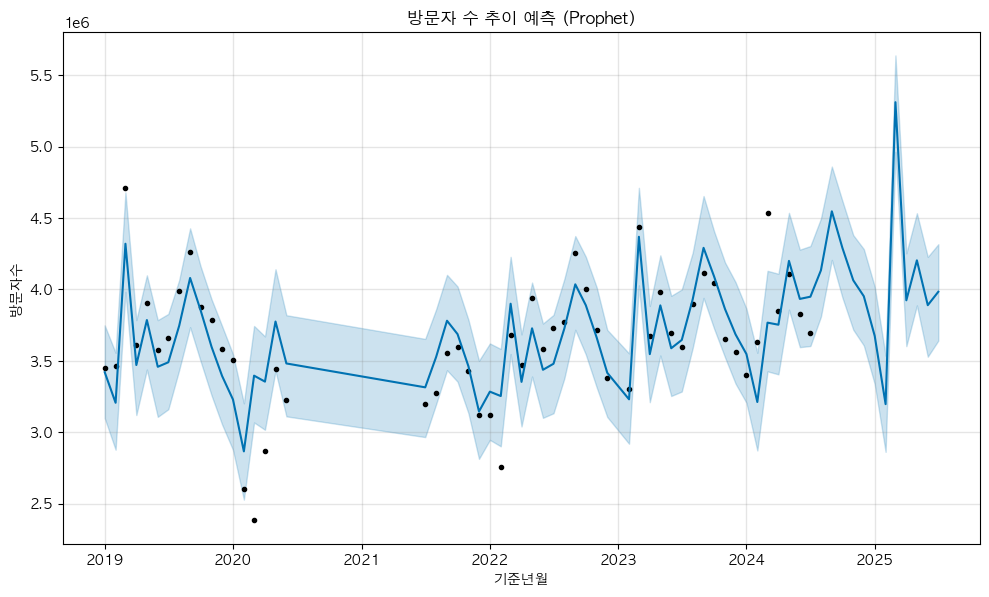

In [73]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = 'combined_sorted.csv'
df_combined = pd.read_csv(file_path, encoding='utf-8')

# 2. 데이터 전처리
# '기준년월' 칼럼을 datetime 형식으로 변환
df_combined['기준년월'] = pd.to_datetime(df_combined['기준년월'], errors='coerce')

# 결측치가 있는 행 제거
df_combined = df_combined.dropna(subset=['기준년월', '방문자수'])

# Prophet 모델에 필요한 형식으로 데이터 준비
df_prophet = df_combined.rename(columns={'기준년월': 'ds', '방문자수': 'y'})

# 3. Prophet 모델 생성 및 학습
model = Prophet()
model.fit(df_prophet)

# 4. 미래 데이터 생성 (예측할 기간 설정)
future = model.make_future_dataframe(periods=12, freq='M')  # 12개월 예측

# 5. 예측
forecast = model.predict(future)

# 6. 시각화
fig = model.plot(forecast)
plt.xlabel('기준년월')
plt.ylabel('방문자수')
plt.title('방문자 수 추이 예측 (Prophet)')
plt.show()


# 해설
x축은 기준 연월(기준 날짜), y축은 방문자 수를 나타냅니다.
파란색 실선은 모델이 예측한 방문자 수의 추세를 나타냅니다.
검은 점들은 실제 관측된 데이터 포인트를 나타냅니다.
파란색 음영 영역은 예측의 불확실성 구간(Confidence Interval)을 나타내며, 이 구간이 넓을수록 예측의 불확실성이 크다는 것을 의미합니다.
Prophet 모델에서 예측된 값은 실제 데이터와 비교적 일치하는 경향을 보입니다.
모델은 계절성 및 추세를 잘 반영하며, 예측 구간이 넓어질 때는 데이터의 변동성이 크거나 불확실성이 높아지는 시점을 나타냅니다.
특히 미래 시점에서는 예측의 불확실성(파란색 음영)이 증가하여 방문자 수가 어떤 범위 내에서 변동할 가능성이 크다는 것을 시사합니다.

==>>

In [65]:
pip install prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 1.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 2.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 243.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 749.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 1.0 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.5/376.5 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 3.0 MB/s eta 0:00:000

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=731999 sha256=2fe0d3df03a120f5737d78da07dc75b74938cb381eb9f05b6087b5fe109a8155
  Stored in directory: /Users/kimminji/Library/Caches/pip/wheels/74/47/c4/678b0a3d5213e2f8500f3ea0f8dc3c81478e5b806c557dff58
Successfully built pymeeus
Failed to build fbprophet pystan
  Running setup.py install for pystan ... done
  DEPRECATION: pystan was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. pip 23.1 will enforce this behaviour change. A possible replacement is to fix the wheel build issue reported above. 

# SARIMA (Seasonal ARIMA)
파란선 (Actual)
의미: 실제 방문자 수 데이터를 나타냅니다.
붉은선 (Forecast)
의미: SARIMA 모델을 사용하여 예측한 미래 방문자 수를 나타냅니다.
붉은 음영 (Confidence Interval)
의미: 예측의 신뢰 구간을 나타냅니다.

실제 데이터와 예측의 비교: 파란선은 과거의 실제 데이터를 보여주고, 붉은선은 모델의 예측 결과를 나타냅니다. 예측 선이 실제 데이터와 비교하여 어떻게 변동하는지를 확인할 수 있습니다.
신뢰 구간의 중요성: 붉은 음영 영역은 예측의 불확실성을 나타냅니다. 예측값이 신뢰 구간 내에 있을 확률이 높으므로, 이 범위를 확인함으로써 예측의 신뢰도를 가늠할 수 있습니다.

/Users/kimminji/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kimminji/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kimminji/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


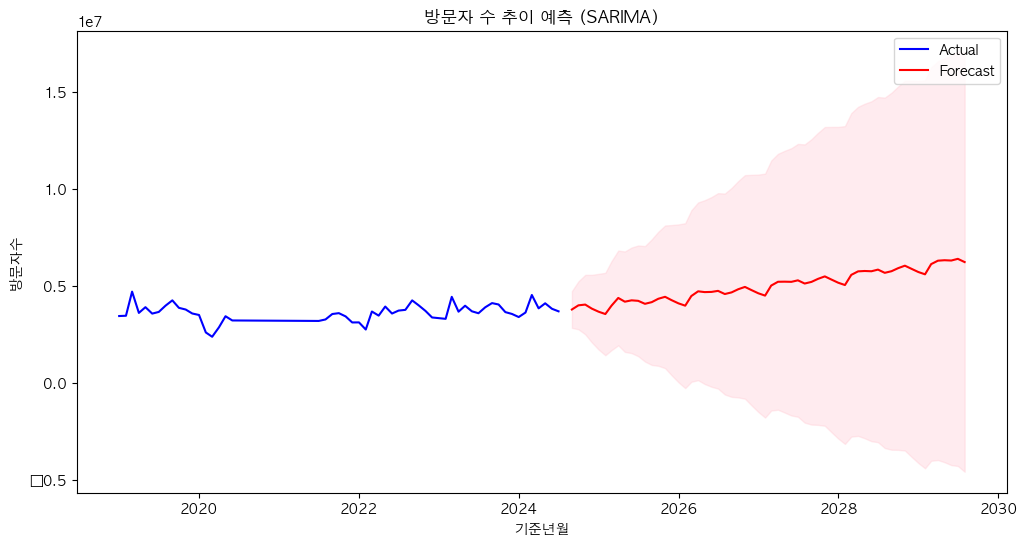

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. 데이터 불러오기
file_path = 'combined_sorted.csv'
df_combined = pd.read_csv(file_path, encoding='utf-8')

# 2. 데이터 전처리
# '기준년월' 칼럼을 datetime 형식으로 변환
df_combined['기준년월'] = pd.to_datetime(df_combined['기준년월'], errors='coerce')

# 결측치가 있는 행 제거
df_combined = df_combined.dropna(subset=['기준년월', '방문자수'])

# 데이터 인덱스 설정
df_combined.set_index('기준년월', inplace=True)

# 3. SARIMA 모델 생성 및 학습
# p, d, q는 비계절적 ARIMA 파라미터
# P, D, Q, s는 계절적 ARIMA 파라미터 및 계절 주기
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

model = SARIMAX(df_combined['방문자수'], 
                 order=(p, d, q), 
                 seasonal_order=(P, D, Q, s))

# 모델 학습
results = model.fit(disp=False)

# 4. 미래 데이터 생성 (예측할 기간 설정: 5년 = 60개월)
forecast = results.get_forecast(steps=60)
forecast_index = pd.date_range(start=df_combined.index[-1] + pd.DateOffset(months=1), periods=60, freq='M')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# 5. 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['방문자수'], label='Actual', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')

# Confidence intervals
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('기준년월')
plt.ylabel('방문자수')
plt.title('방문자 수 추이 예측 (SARIMA)')
plt.legend()
plt.show()
